In [1]:
import xml.etree.cElementTree as ET
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import random
print("hey")

hey


In [2]:
def handle_origin_image():
#   it shows we try to rescale whidth and height to 0.3 times of each
    x = 2456
    y = 2048
    im_max = max(x, y)
    im_min = min(x, y)
    scale = 600 / im_min
    if scale * im_max >1000:
        scale = 1000 / im_max
    print(scale)
handle_origin_image()

0.29296875


In [3]:
def load_pascal_annotation( index):
        filename = os.path.join("/Users/crispus/Desktop/capstone/data/VOC2007/Annotations", index + ".xml")
        tree = ET.parse(filename)
        flaw = tree.find("object")
        box = np.zeros([4], dtype=np.uint16)
        # the array to present class
        gt_class = np.zeros([9], dtype=np.int32)
        bbox = flaw.find('bndbox')
        x1 = float(bbox.find('xmin').text)
        y1 = float(bbox.find('ymin').text)
        x2 = float(bbox.find('xmax').text)
        y2 = float(bbox.find('ymax').text)
        # get the number represent flaw
        area = (x2 - x1) * (y2 - y1)
        box[:] = [x1, y1, x2, y2]
        return {'box': box, 'index': index, 'area': area}
def read_file():
    filename="/Users/crispus/Desktop/capstone/data/VOC2007/ImageSets/Main/trainval.txt"
    datas=open(filename)
    lines=datas.readlines()
    data=[]
    for line in lines:
        data.append(load_pascal_annotation(line.strip()))
    return data

In [4]:
def draw_ratios():
    record=[]
    for info in data:
        box=info.get('box')
        if box[2]-box[0]>=box[3]-box[1]:
           record.append(round((box[2]-box[0])/(box[3]-box[1])))
        else:
            record.append(round((box[3]-box[1])/(box[2]-box[0])))
#     result = pd.value_counts(record)
#     print(result)
    plt.hist(record, bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
    plt.xlabel("ratios")
    plt.ylabel("times")
    plt.title("ratios of all bounding box")
    plt.savefig("/Users/crispus/Desktop/capstone/document/ratios.png")


[9.876181834423239, 41.286353841843386, 113.90691528635534, 83.20153547236433, 30.084806306459626, 54.06641340036903, 99.0224370395546, 261.19212496017605, 68.71331473706796, 19.60142437705088]


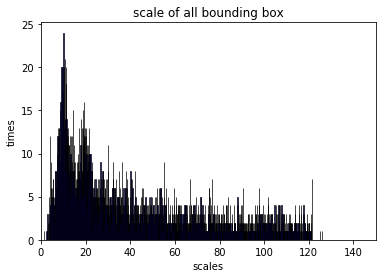

In [6]:
def iou(box,gt_box):
    if box[0]>gt_box[2] or box[1]>gt_box[3] or box[2]<gt_box[0] or box[3]<gt_box[1]:
        return 0.0
    xmin=max(box[0],gt_box[0])
    ymin=max(box[1],gt_box[1])
    xmax=max(box[2],gt_box[2])
    ymax=max(box[3],gt_box[3])
    area=(xmax-xmin)*(ymax-ymin)
    square1=(box[2]-box[0])*(box[3]-box[1])
    square2=(gt_box[2]-gt_box[0])*(gt_box[3]-gt_box[1])
    iou=area/(square1+square2-area+ 1e-10)
    
def distance(a,b):
    return abs(a-b)

def generate_initial(data,k):
    first=data[0]
    center=[first]
    dis=[distance(i,first) for i in data[1:]]
    le=min(dis)
    total=sum([i**2 for i in dis])
    prob=[(i**2)/total for i in dis]
    for _ in range(k-1): 
        r=random.random()
        su=0
        for i in range(len(prob)):
            su+=prob[i]
            if r<=su:
                break
        center.append(data[i+1])
    return center

def kmean(data,k=10):
    center=generate_initial(data,k)
    record=np.zeros((len(data),2))
    data=np.array(data)
    change=True
    while change:
        change=False
        for i in range(len(data)):
            mindis=float('inf')
            index=-1
            for j in range(len(center)):
                dis=distance(center[j],data[i])
                if dis<mindis:
                    mindis=dis
                    index=j
            if record[i,0]!=index:
                change=True
                record[i,:]=index,mindis
        for j in range(k):
            mid=record[:,0]
            points=data[np.nonzero(mid==j)[0]]
            center[j]=np.mean(points)
    return center

def draw_scales():
    datas=read_file()
    areas=[np.sqrt(round(0.09*i.get('area'))) for i in datas]
    print(kmean(areas,10))
    plt.hist(areas, bins=4000, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
    plt.xlabel("scales")
    plt.ylabel("times")
    plt.xlim((0,150))
    plt.title("scale of all bounding box")

draw_scales()
                
    
        